In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit

### Definición de función de ajuste (línea recta)

In [19]:
def line(x,a,b):
    return a*x + b

### Cargamos los datos de porcentajes de tejido adiposo, junto con sus respectivos límites superior e inferior calculados del método descrito en el artículo

In [20]:
p_ad = np.genfromtxt("adipose_percentages.txt")
error = np.genfromtxt("adipose_percentages_minus.txt") - np.genfromtxt("adipose_percentages_plus.txt")
p_gl = 1 - p_ad
print(100*p_gl, "+-", 100*error)

[10.12 18.52 27.03 35.44 43.95 52.46 61.07 69.57 78.18] +- [1.71 1.6  1.7  1.7  1.7  1.7  1.7  1.71 1.7 ]


### Cargamos los datos de intensidades promedio normalizadas de cada escalón y los respectivos errores

In [21]:
means = np.genfromtxt("means_intensity.txt")
error_int = np.genfromtxt("errors_intensity.txt")

### Convertimos los datos anteriores a un dataframe de Pandas

In [22]:
df = pd.DataFrame({"glandular percentage":100*p_gl, "error percentage":100*error, "mean intensities":means, "error intensities":error_int })

df

,glandular percentage,error percentage,mean intensities,error intensities
0,10.12,1.71,8.912875e+01,1.401447
1,18.52,1.60,7.153538e+01,1.156859
2,27.03,1.70,6.063014e+01,2.047879
3,35.44,1.70,5.367199e+01,1.413786
4,43.95,1.70,3.739752e+01,0.993433
5,52.46,1.70,2.669996e+01,1.751661
6,61.07,1.70,2.203007e+01,1.839386
7,69.57,1.71,1.160545e+01,0.986853
8,78.18,1.70,1.324315e-14,1.000000


### Realizamos el ajuste de los datos de intensidad promedio normalizada vs porcentaje adiposo (de 0 a 100) e imprimimos matriz de covarianza 

In [23]:
popt, pcov = curve_fit(line, 100*p_gl, means)
print(pcov) # Imprimimos matriz de covarianza

[[ 2.69793559e-03 -1.18811088e-01]
 [-1.18811088e-01  6.53419485e+00]]


0.051941655587263394 2.556207122341696


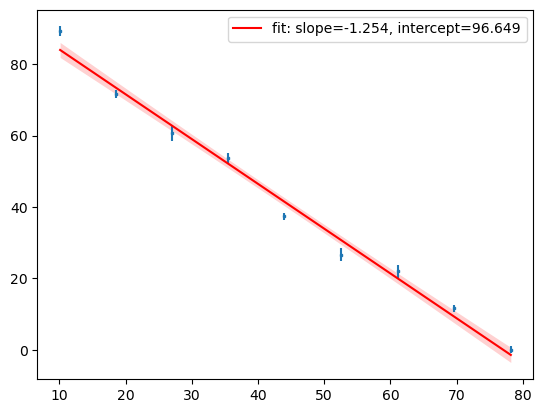

In [49]:
err_slope = np.sqrt(pcov[0][0])
err_inter = np.sqrt(pcov[1][1])

print(err_slope, err_inter)

xi = np.linspace(np.min(100*p_gl), np.max(100*p_gl), 100)
ps = np.random.multivariate_normal(popt, pcov, 10000) # Generamos 10000 puntos distribuidos normalmente (Gaussiana 2D, con promedios dados por los parámetros optimos encontrados para la pendiente y el intercepto y con la matriz de covarianza dada por la matriz de covarianza encontrada del ajuste)
ysample = np.asarray([line(xi, *pi) for pi in ps]) # Hallamos los valores de la recta usando como parametros de fit los parámetros encontrados anteriormente (hallamos puntos dentro del intervalo de confianza)
lower = np.percentile(ysample, 10, axis=0) # Conservamos los puntos dentro de la banda que estén en el percentil 2.5 (límite inferior)
upper = np.percentile(ysample, 90, axis=0) # Conservamos los puntos dentro de la banda que estén en el percentil 97.5 (límite superior)

lower_2 = line(xi, *popt) - np.sqrt(pcov[0][0]*(xi**2) + pcov[1][1] + 2*pcov[0][1]*xi)
upper_2 = line(xi, *popt) + np.sqrt(pcov[0][0]*(xi**2) + pcov[1][1] + 2*pcov[0][1]*xi)


# Graficamos
fig = plt.figure()
plt.errorbar(100*p_gl, means, yerr=error_int, xerr=error, ls="none", marker='s', markersize=2)
plt.plot(100*p_gl, line(100*p_gl, *popt), 'r-',label='fit: slope=%5.3f, intercept=%5.3f' % tuple(popt))
#plt.fill_between(xi, lower, upper, alpha=0.18, edgecolor='#3F7F4C', facecolor='red', linewidth=0)
plt.fill_between(xi, lower_2, upper_2, alpha=0.18, edgecolor='#3F7F4C', facecolor='red', linewidth=0)
plt.legend()
plt.show()
fig.savefig("int_gl_calibration.svg")

In [41]:
print(np.sqrt(pcov[0][0]*(xi**2) + pcov[1][1] + 2*pcov[0][1]*xi))

[2.09899164 2.06911144 2.03941869 2.0099217  1.98062922 1.95155046
 1.92269511 1.89407338 1.86569602 1.83757436 1.80972032 1.78214644
 1.75486593 1.72789269 1.70124133 1.67492721 1.64896649 1.62337612
 1.59817388 1.57337844 1.54900931 1.52508695 1.5016327  1.47866883
 1.45621855 1.43430598 1.41295613 1.39219488 1.37204897 1.35254588
 1.33371382 1.3155816  1.29817856 1.28153438 1.26567902 1.25064247
 1.23645462 1.22314498 1.21074253 1.19927541 1.18877069 1.17925409
 1.1707497  1.16327972 1.1568642  1.15152075 1.14726436 1.14410716
 1.14205826 1.14112364 1.14130603 1.14260489 1.14501644 1.14853365
 1.15314642 1.15884165 1.16560349 1.17341349 1.18225088 1.19209282
 1.20291464 1.21469015 1.22739192 1.24099149 1.25545969 1.27076685
 1.28688304 1.30377826 1.32142261 1.33978651 1.35884079 1.37855681
 1.3989066  1.41986291 1.44139928 1.46349011 1.48611067 1.50923714
 1.53284662 1.55691715 1.58142766 1.60635802 1.63168898 1.65740218
 1.6834801  1.70990605 1.73666415 1.76373928 1.79111706 1.8187